# 규제 선형 모델

- 다항식이 복잡해지면서 회귀계수 값이 크게 설정되고 이는 과대적합을 유발함
    - 과대적합이 일어나면 훈련데이터에서는 높은 성능을 보이지만 테스트데이터에서는 낮은 성능을 보임
- 선형 회귀 모델의 목적은 비용 함수를 최소화 하는 것
- 이때, 규제 선형 모델은 비용 함수를 최소화하는 데에 패널티를 적용해 회귀계수의 크기를 제한함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

boston_df = pd.read_csv('./data/boston_housing_train.csv')

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 평가지표 계산 및 출력하는 함수 정의
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')

### Ridge 회귀

- L2 규제를 적용한 회귀 모델
- 회귀계수들(가중치, 모델 파라미터)의 제곱합에 alpha 패널티를 곱해 비용 산정에 반영
    - alpha 값이 커지면 회귀계수가 작아짐

In [5]:
from sklearn.linear_model import Ridge

reg_l2 = Ridge()

reg_l2.fit(X_train, y_train)
print(reg_l2.score(X_train, y_train), reg_l2.score(X_test, y_test))
evaluate_regression(y_test, reg_l2.predict(X_test))

0.7461161787884155 0.678974832784608
MSE: 22.480475501233855 | RMSE: 4.741357980709098 | MAE: 3.050375126006179 | R2score: 0.678974832784608


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

reg_l2_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('reg_l2', Ridge(alpha=100))
])

reg_l2_model.fit(X_train, y_train)
print(reg_l2_model.score(X_train, y_train), reg_l2_model.score(X_test, y_test))
evaluate_regression(y_train, reg_l2_model.predict(X_train))
evaluate_regression(y_test, reg_l2_model.predict(X_test))

0.922557959447853 0.796056183892697
MSE: 6.867694250081351 | RMSE: 2.620628598272054 | MAE: 1.9687946082912124 | R2score: 0.922557959447853
MSE: 14.281602907949667 | RMSE: 3.7791008067991076 | MAE: 2.4589907450590327 | R2score: 0.796056183892697


0.7480866010505813 0.6843661931540773
[-1.28237786e-01  2.95841350e-02  4.82878715e-02  2.77000410e+00
 -1.61020370e+01  4.36929434e+00 -9.36349674e-03 -1.39884572e+00
  2.57494652e-01 -9.97227349e-03 -9.21456342e-01  1.31909876e-02
 -5.17918597e-01]
0.7480303017255328 0.6838049959091366
[-1.27536016e-01  2.98537815e-02  4.35486433e-02  2.74033483e+00
 -1.49671032e+01  4.37348397e+00 -1.03183434e-02 -1.38208336e+00
  2.55296380e-01 -1.00999145e-02 -9.07649627e-01  1.32371402e-02
 -5.20257280e-01]
0.7461161787884155 0.678974832784608
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
0.7398240895568371 0.6724237562438147
[-0.12137453  0.03421897 -0.01307037  1.8210257  -1.68747299  4.09010212
 -0.01841796 -1.18806788  0.24351944 -0.01208251 -0.76717881  0.01369631
 -0.5734354 ]
0.7212640976807133 0.6754494740364398
[-0.12409594  0.03823717 -0.03483639  0.55335885 -0.1706479   2.3

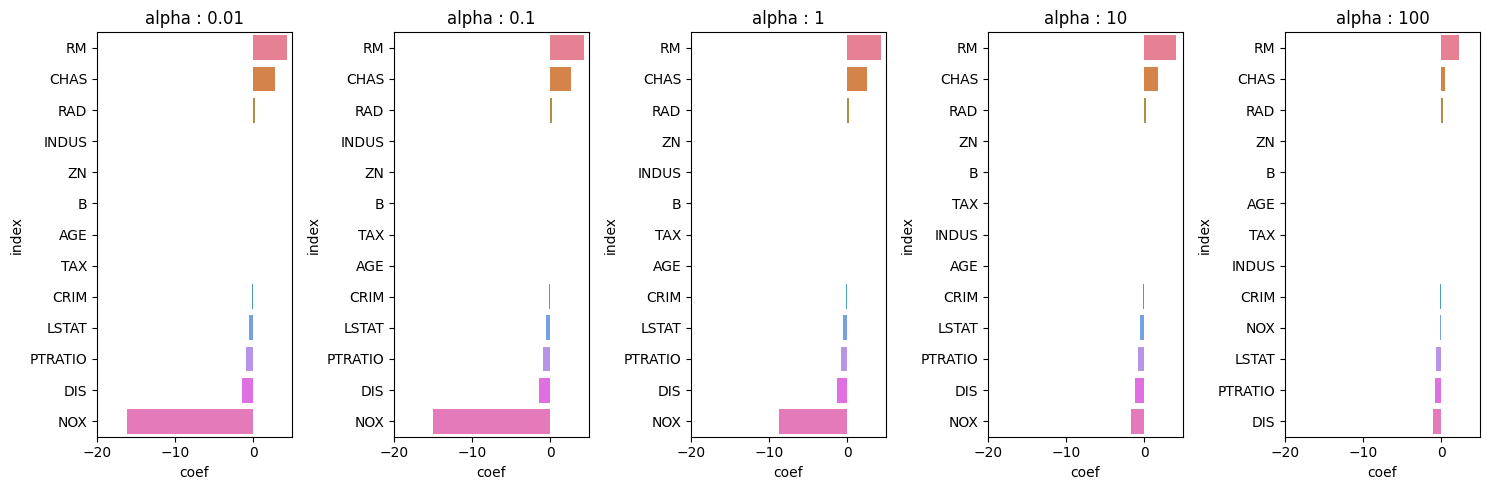

In [ ]:
# alpha 값에 따른 시각화
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

alphas = [0.01, 0.1, 1, 10, 100]

for i, alpha in enumerate(alphas):
    model = Pipeline([
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('reg', Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)

    print(model.score(X_train, y_train), model.score(X_test, y_test))

    coef = model.named_steps['reg'].coef_
    coef_ser = pd.Series(coef, index=X.columns)
    coef_ser.name = 'alpha : ' + str(alpha)
    coef_ser = coef_ser.sort_values(ascending=False)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20, 5)
    sns.barplot(x=coef_ser.values, y=coef_ser.index, ax=ax[i], hue=coef_ser.index)

plt.tight_layout()
plt.show()

### Lasso 회귀

- L1 규제를 적용한 선형 회귀 모델
- 회귀계수 절대값의 합을 alpha 값과 곱해 규제 정도 지정
    - alpha 값이 커지면 규제 정도가 커짐
- 회귀계수를 0까지 줄일 수 있음 == 해당 특성을 아예 반영하지 않도록 함 == 특성 선택 효과

In [24]:
from sklearn.linear_model import Lasso

reg_l1 = Lasso(alpha=1)
reg_l1.fit(X_train, y_train)
print(reg_l1.score(X_train, y_train), reg_l1.score(X_test, y_test))
print(reg_l1.coef_)

0.6948040743556285 0.6516957380017043
[-0.0838981   0.02646051 -0.          0.          0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]


### ElasticNet 회귀

- L1, L2 규제를 함께 적용하는 회귀 모델
- 하이퍼 파라미터
    - alpha: 규제 정도 (L1규제 + L2규제)
    - l1_ratio: L1 규제의 비율 (L2 규제의 비율 == 1 - l1_ratio)

In [ ]:
from sklearn.linear_model import ElasticNet

reg_ela = ElasticNet(alpha=1, l1_ratio=0.5)     # 기본값

reg_ela.fit(X_train, y_train)
print(reg_ela.score(X_train, y_train), reg_ela.score(X_test, y_test))
print(reg_ela.coef_)

0.6914758177681419 0.6584782663638298
[-0.11304195  0.03616532 -0.02567739  0.01331622  0.          1.08071656
  0.01537004 -0.76232832  0.28676237 -0.01396857 -0.76004478  0.01203943
 -0.78366959]
